#Ensambles de métodos

## *Bagging*


### *Decision tree & Bagged Decision Tree*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [ ]:
data

,class,cover,slope,ev,pre,rad,soilH,2mT,skinT,soilT
0,0,30.0,403.50647,-0.001678,1.490116e-08,7159174.5,0.232147,302.67395,303.26575,304.08688
1,0,30.0,250.00381,-0.001923,1.490116e-08,7073021.5,0.215638,302.71222,303.54526,304.51680
2,0,126.0,212.87057,-0.002313,1.490116e-08,7129897.5,0.228749,302.73688,303.11945,304.31485
3,0,30.0,866.94025,-0.001745,1.490116e-08,7096962.5,0.205990,302.64610,303.77133,304.63388
4,0,30.0,367.85410,-0.001276,1.490116e-08,7126602.0,0.218015,302.63174,303.76970,304.32547
...,...,...,...,...,...,...,...,...,...,...
1464447,0,112.0,2422.13570,-0.000619,2.609683e-03,1952757.6,0.492312,297.48560,297.33017,298.54330
1464448,0,112.0,2993.21500,-0.000628,2.271747e-03,1909936.1,0.457042,297.37552,297.07474,298.37622
1464449,0,112.0,4160.89260,-0.000651,1.880897e-03,1876406.0,0.461279,297.50500,297.25235,298.43720
1464450,0,112.0,5543.09800,-0.000586,2.303014e-03,1963665.1,0.465314,297.77063,297.69022,298.73334


In [ ]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)


(380000, 9)
(380000,)


In [ ]:
  from imblearn.under_sampling import RandomUnderSampler
  rus=RandomUnderSampler(sampling_strategy=0.5)
  X,y=rus.fit_resample(X,y)
  print(X.shape)
  print(y.shape)

(2118, 9)
(2118,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=100, min_samples_leaf=100)

In [ ]:
dtc.fit(X,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
                       min_samples_split=100)

In [ ]:
print(f'Decision tree has {dtc.tree_.node_count} nodes with maximum depth {dtc.tree_.max_depth}.')

Decision tree has 27 nodes with maximum depth 6.


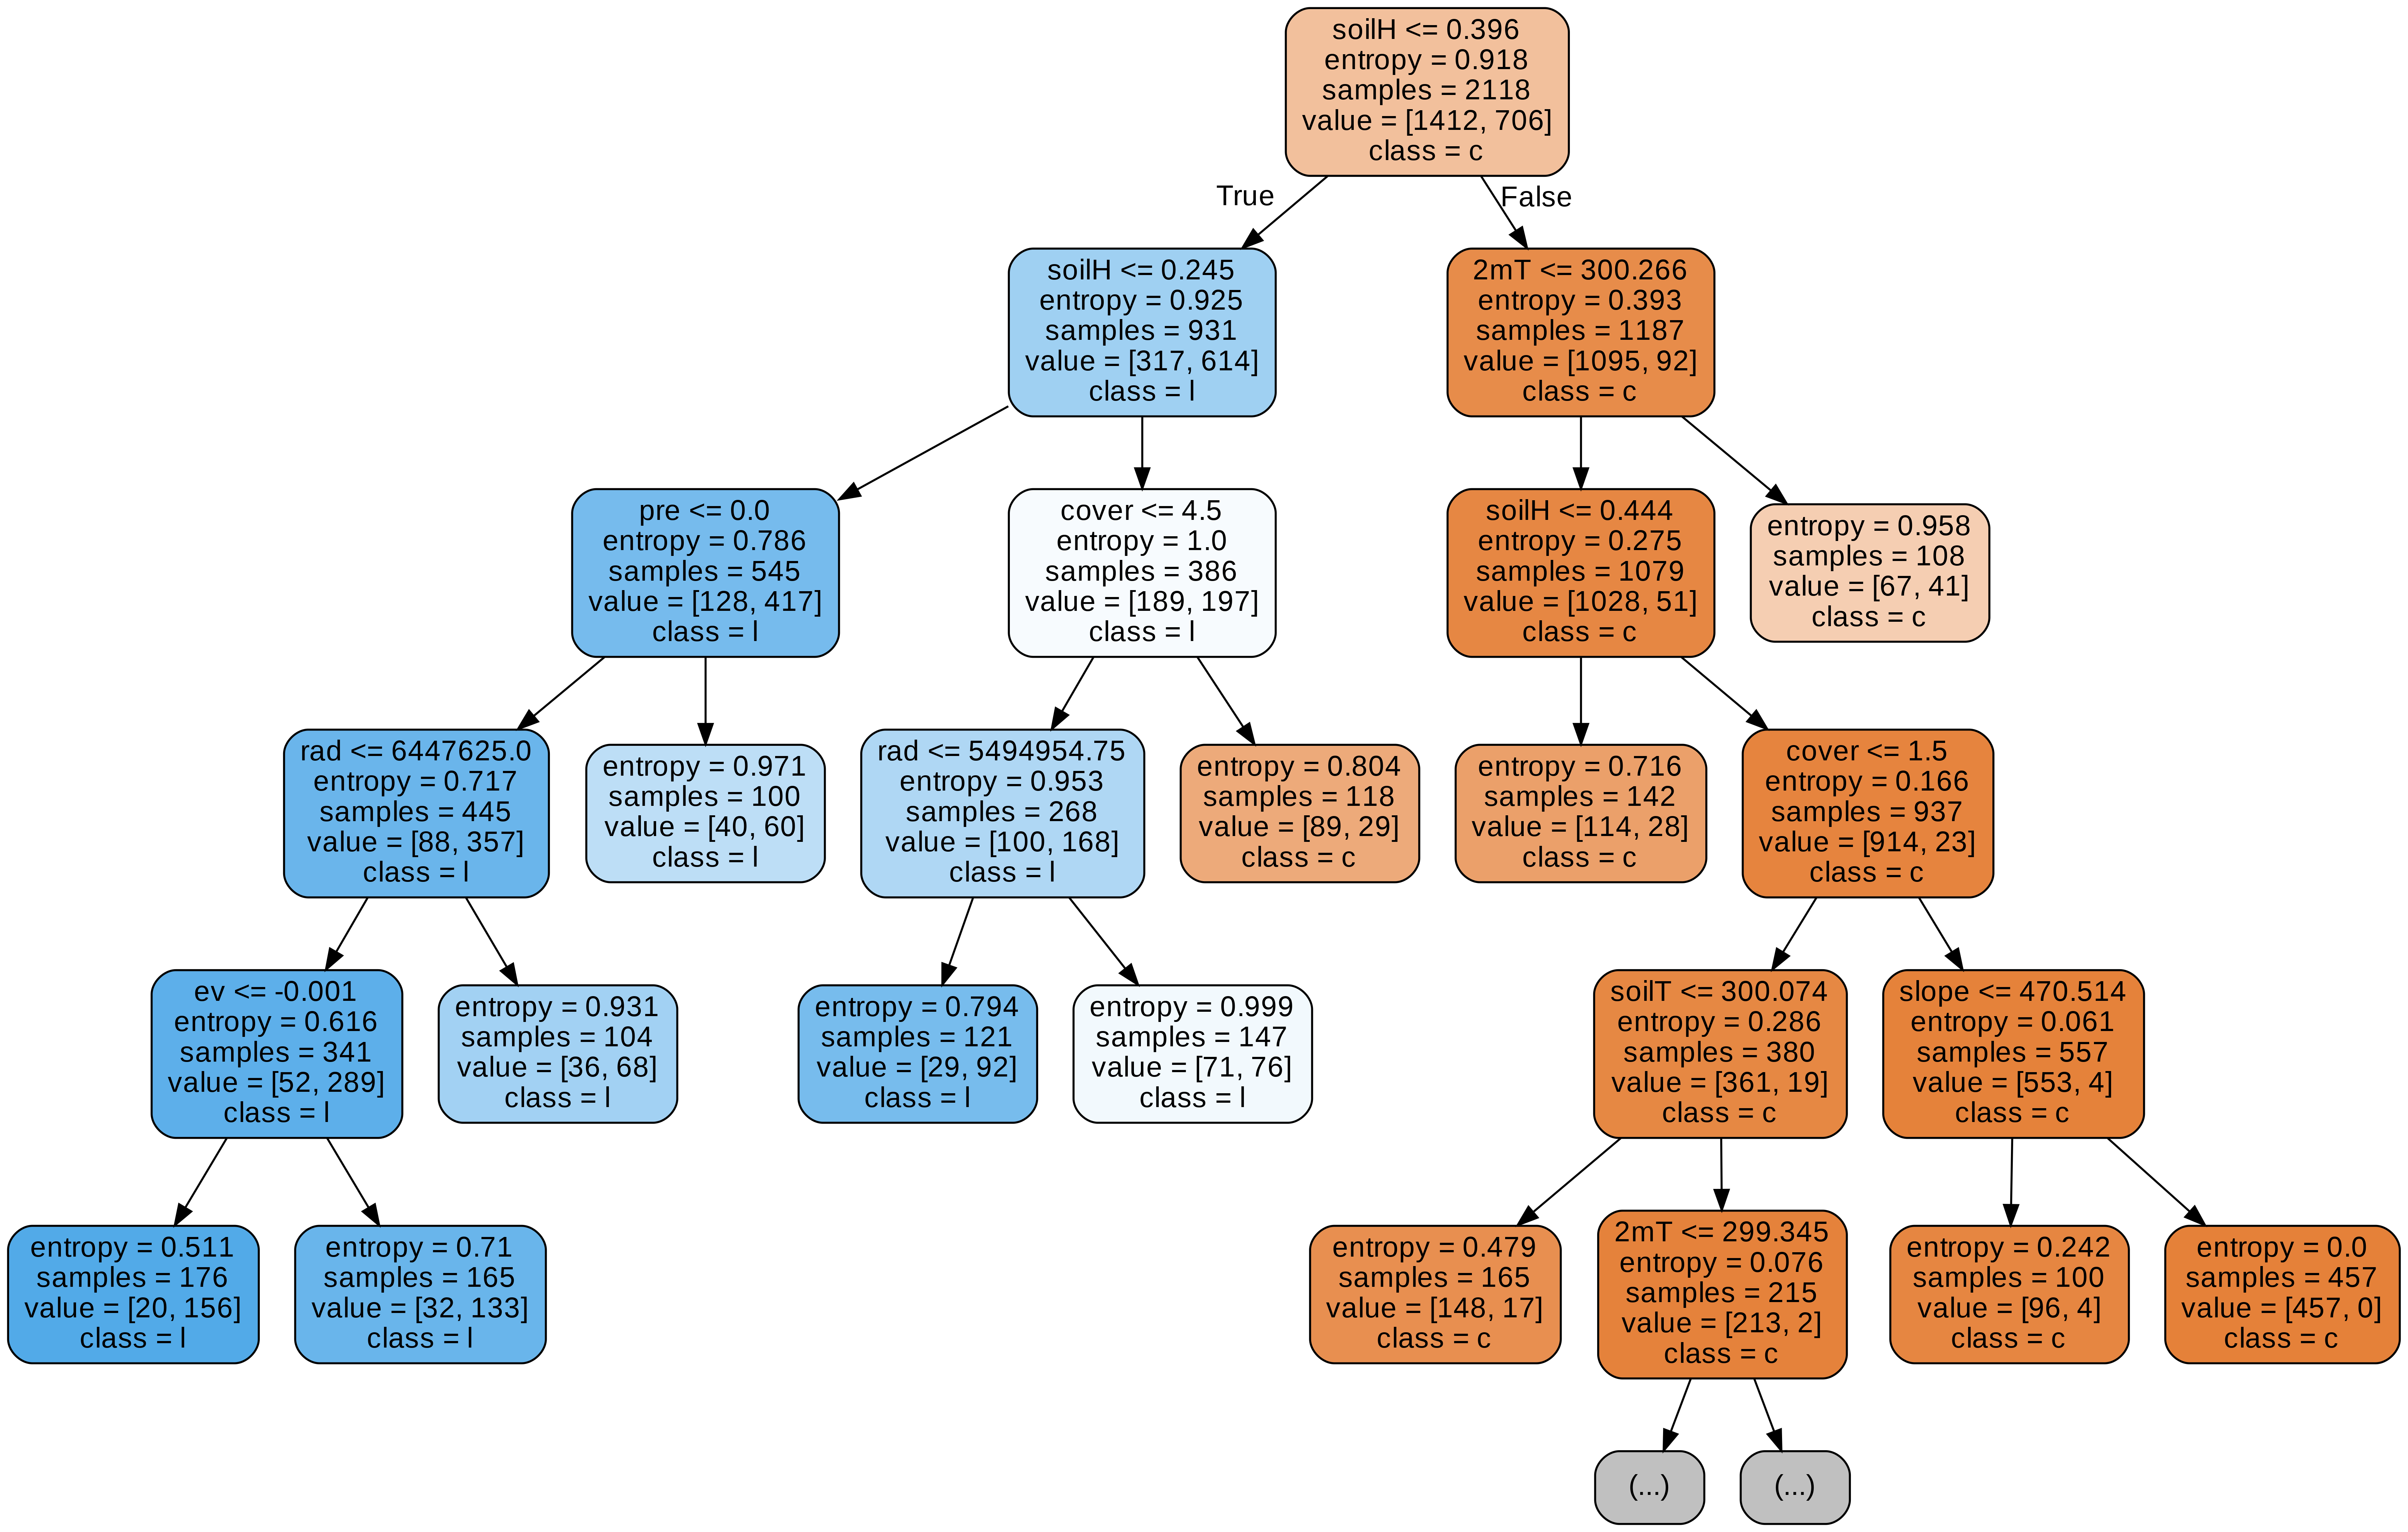

In [ ]:
from sklearn.tree import export_graphviz

# Para exportar a .dot
export_graphviz(dtc,'tree.dot',rounded=True,max_depth=5,feature_names=data.columns[1:],class_names=data.columns[0],filled=True)

# Para convertir a png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);
#Si no transforma el archivo tree.dot, vaya a http://www.webgraphviz.com/ e ingrese el archivo dot para visualizarlo.

from IPython.display import Image
Image(filename='tree.png')

In [ ]:
y_pred = dtc.predict(X_test)
print(dtc.score(X_test,y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.8207547169811321
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       283
           1       0.69      0.83      0.75       141

    accuracy                           0.82       424
   macro avg       0.80      0.82      0.81       424
weighted avg       0.83      0.82      0.82       424



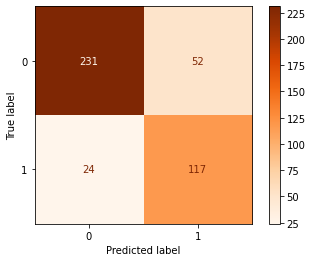

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")


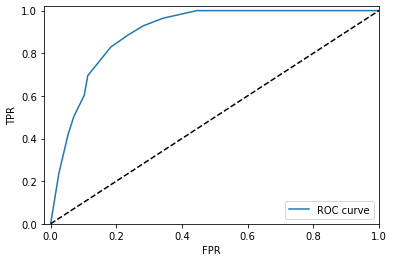

In [ ]:
from sklearn.metrics import roc_curve
probs=dtc.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
importances = list(dtc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns[1:],importances)]
feature_importances

[('cover', 0.05),
 ('slope', 0.01),
 ('ev', 0.0),
 ('pre', 0.01),
 ('rad', 0.03),
 ('soilH', 0.79),
 ('2mT', 0.08),
 ('skinT', 0.0),
 ('soilT', 0.02)]

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=dtc, n_estimators=100)
bc.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        min_samples_leaf=100,
                                                        min_samples_split=100),
                  n_estimators=100)

In [ ]:
y_pred = bc.predict(X_test)
print(bc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8207547169811321
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       283
           1       0.69      0.82      0.75       141

    accuracy                           0.82       424
   macro avg       0.80      0.82      0.81       424
weighted avg       0.83      0.82      0.82       424



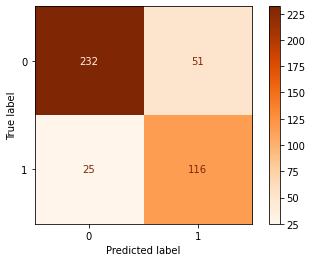

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

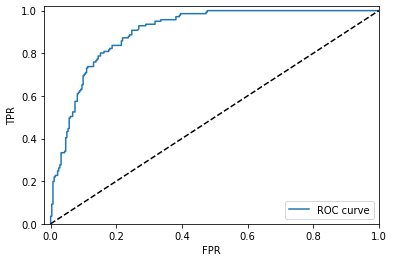

In [ ]:
from sklearn.metrics import roc_curve
probs=bc.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
results = cross_val_score(bc, X, y, cv=kfold)
print(results.mean())

0.7383536286185824


Esto significa que es posible *Bagged* cualquier método. A continuación se presenta el modelo SVC *Bagged*.

In [ ]:
from sklearn.svm import SVC
svc=SVC()
bc_svc = BaggingClassifier(base_estimator=svc, n_estimators=100, random_state=1)
bc_svc.fit(X,y)

BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=1)

In [ ]:
y_pred = bc_svc.predict(X_test)
print(bc_svc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.6674528301886793
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       283
           1       0.00      0.00      0.00       141

    accuracy                           0.67       424
   macro avg       0.33      0.50      0.40       424
weighted avg       0.45      0.67      0.53       424



### *Random Forests*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=2)

In [ ]:
 rf.fit(X_train,y_train)

RandomForestClassifier(max_features=2)

In [ ]:
y_pred = rf.predict(X_test)
print(rf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8632075471698113
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       283
           1       0.77      0.84      0.80       141

    accuracy                           0.86       424
   macro avg       0.84      0.86      0.85       424
weighted avg       0.87      0.86      0.86       424



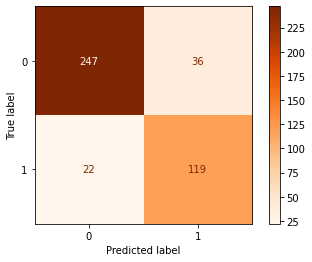

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

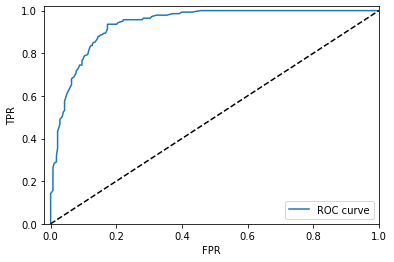

In [ ]:
from sklearn.metrics import roc_curve
probs= rf.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
results = cross_val_score(rf, X, y, cv=kfold)
print(results.mean())

0.8058689058387973


In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns[1:], importances)]
feature_importances

[('cover', 0.04),
 ('slope', 0.07),
 ('ev', 0.07),
 ('pre', 0.11),
 ('rad', 0.09),
 ('soilH', 0.19),
 ('2mT', 0.15),
 ('skinT', 0.12),
 ('soilT', 0.16)]

## Boosting Algorithms


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=30, random_state=1)

In [ ]:
adb.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30, random_state=1)

In [ ]:
y_pred = adb.predict(X_test)
print(adb.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8278301886792453
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       283
           1       0.72      0.78      0.75       141

    accuracy                           0.83       424
   macro avg       0.80      0.82      0.81       424
weighted avg       0.83      0.83      0.83       424



In [ ]:
importances = list(adb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns[1:], importances)]
feature_importances

[('cover', 0.03),
 ('slope', 0.1),
 ('ev', 0.13),
 ('pre', 0.13),
 ('rad', 0.17),
 ('soilH', 0.2),
 ('2mT', 0.1),
 ('skinT', 0.03),
 ('soilT', 0.1)]

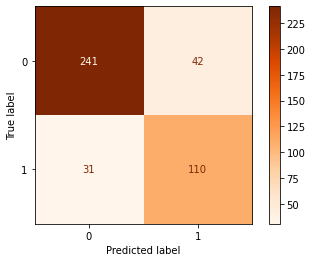

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

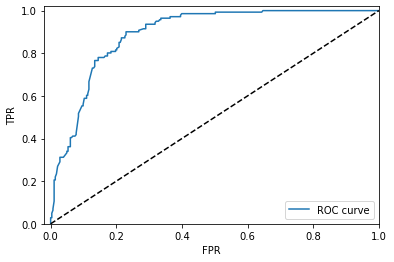

In [ ]:
from sklearn.metrics import roc_curve
probs= adb.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
results = cross_val_score(adb, X, y, cv=kfold)
print(results.mean())

0.7789196663544316


### Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=1)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
y_pred = gbc.predict(X_test)
print(gbc.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8537735849056604
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       283
           1       0.75      0.84      0.79       141

    accuracy                           0.85       424
   macro avg       0.83      0.85      0.84       424
weighted avg       0.86      0.85      0.86       424



In [ ]:
results = cross_val_score(gbc, X, y, cv=kfold)
print(results.mean())

0.8001951469735491


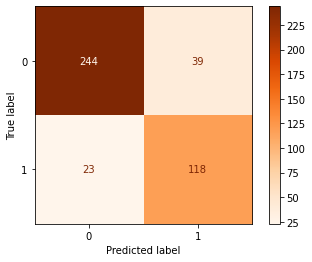

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

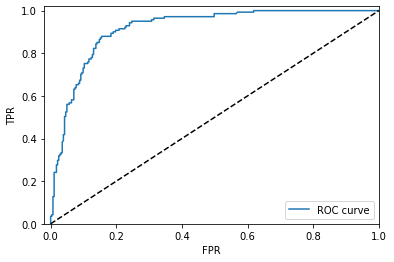

In [ ]:
from sklearn.metrics import roc_curve
probs= gbc.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
importances = list(gbc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns[1:], importances)]
feature_importances

[('cover', 0.04),
 ('slope', 0.06),
 ('ev', 0.05),
 ('pre', 0.06),
 ('rad', 0.06),
 ('soilH', 0.54),
 ('2mT', 0.11),
 ('skinT', 0.03),
 ('soilT', 0.06)]

## XGBoost

In [ ]:
import xgboost as xgb 
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators= 7, seed=44)

In [ ]:
model.fit(X_train, y_train) 

XGBClassifier(n_estimators=7, seed=44)

In [ ]:
y_pred = model.predict(X_test)
accuracy = float(np.sum(y_pred == y_test)) / y_test.shape[0]
accuracy

0.8372641509433962

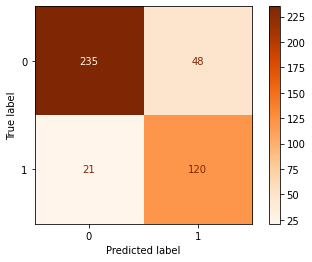

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

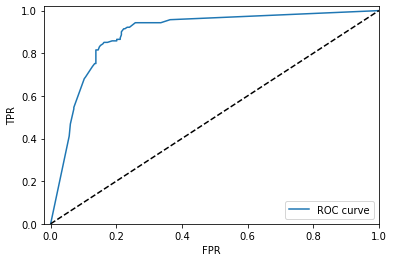

In [ ]:
from sklearn.metrics import roc_curve
probs= model.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [ ]:
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8372641509433962
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       283
           1       0.71      0.85      0.78       141

    accuracy                           0.84       424
   macro avg       0.82      0.84      0.82       424
weighted avg       0.85      0.84      0.84       424

